# Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data using pandas

In [3]:
# openpyxl must be installed.
df = pd.read_excel("sales.xlsx")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### shape and columns

In [8]:
df.shape

(525461, 8)

In [5]:
df.columns

Index(['InvoiceNumber', 'ProductCode', 'ProductName', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerId', 'Country'],
      dtype='object')

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
Preprocessing data
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Removing rows which is not including <code>CustomerId</code>
</font>
</p>

In [4]:
df_no_missing_customer = df.copy()
df_no_missing_customer.dropna(subset=["CustomerId"], inplace=True)
df_no_missing_customer.isna().sum()

InvoiceNumber    0
ProductCode      0
ProductName      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerId       0
Country          0
dtype: int64

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Delete duplicate data
</font>
</p>

In [5]:
df_no_duplicate = df_no_missing_customer.copy()
df_no_duplicate.drop_duplicates(inplace=True)

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Delete rows which have 0 or negative value for <code>UnitPrice</code>
</font>
</p>

In [6]:
df_no_missing_price = df_no_duplicate.copy()
df_no_missing_price = df_no_missing_price[df_no_missing_price["UnitPrice"] > 0]
df_no_missing_price.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Percentage of canceled orders
</font>
</p>

In [8]:
canceled_orders_count = df_no_missing_price[df_no_missing_price["InvoiceNumber"].str.startswith("C", na=False)]["InvoiceNumber"].nunique()
all_orders = df_no_missing_price["InvoiceNumber"].nunique()
percentage_canceled_orders = round(canceled_orders_count / all_orders * 100)
percentage_canceled_orders

19

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Top 5 customers with must canceled order.
</font>
</p>

In [21]:
df_temp = df_no_missing_price.copy()
df_temp["CustomerId"] = df_temp["CustomerId"].apply(lambda x : str(int(x)))

group_canceled_customer_id = df_temp[df_temp["InvoiceNumber"].str.startswith("C", na=False)].groupby("CustomerId")

top_5_canceled_customers = group_canceled_customer_id["InvoiceNumber"].nunique().reset_index(name= "count").sort_values(by=["count"], ascending=False).head(5)
top_5_canceled_customers

,CustomerId,count
845,14911,65
720,14527,39
963,15311,37
599,14156,36
1693,17841,35


<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Remove canceled orders
</font>
</p>

In [23]:
df_no_canceled_invoice = df_no_missing_price.copy()

df_no_canceled_invoice = df_no_canceled_invoice[~df_no_canceled_invoice["InvoiceNumber"].str.startswith("C", na=False)]

df_no_canceled_invoice.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Save preprocessed data to new file

In [24]:
df_no_canceled_invoice.to_csv("preprocessed_sales.csv", index=False)

# Read preprocessed data using pandas

In [5]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Exploring given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNumber  400916 non-null  int64  
 1   ProductCode    400916 non-null  object 
 2   ProductName    400916 non-null  object 
 3   Quantity       400916 non-null  int64  
 4   InvoiceDate    400916 non-null  object 
 5   UnitPrice      400916 non-null  float64
 6   CustomerId     400916 non-null  float64
 7   Country        400916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.5+ MB


### Number of remaining orders.

In [7]:
number_of_orders = df["InvoiceNumber"].nunique()
number_of_orders

19213

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Convert <code>InvoiceDate</code> type to datetime using pandas
</font>
</p>

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Finding the time range of orders.
</font>
</p>

In [10]:
orders_range = (df["InvoiceDate"].min(), df["InvoiceDate"].max())
min_range = orders_range[0].strftime("%Y-%m-%d")
max_range = orders_range[1].strftime("%Y-%m-%d")
print(f"({min_range}, {max_range})")

(2009-12-01, 2010-12-09)


## Plot of multiple identical invoices sent on each day.

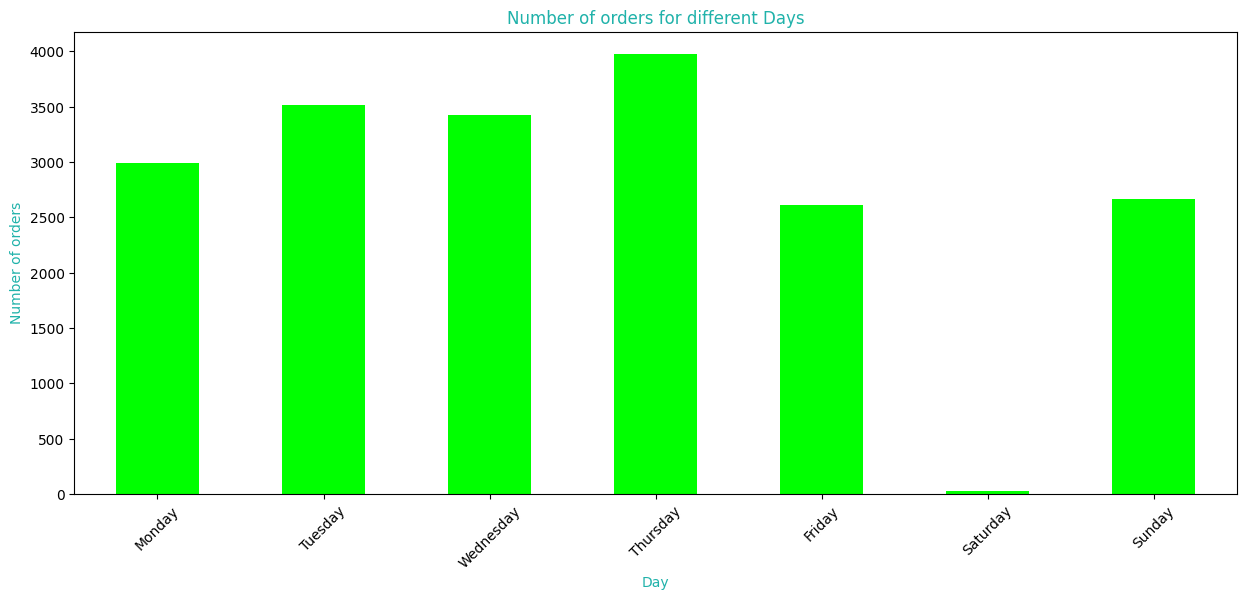

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set_title("Number of orders for different Days", color="lightseagreen")
df["DayOfWeek"] = df["InvoiceDate"].dt.strftime("%A")
group_by_day = df.groupby("DayOfWeek")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
group_by_day["InvoiceNumber"].nunique().loc[day_order].plot(kind="bar", ax=ax, color="lime")
plt.xlabel("Day", color="lightseagreen")
plt.ylabel("Number of orders", color="lightseagreen")
plt.xticks(rotation=45);

## Bar chart of the total sales of each month of each year

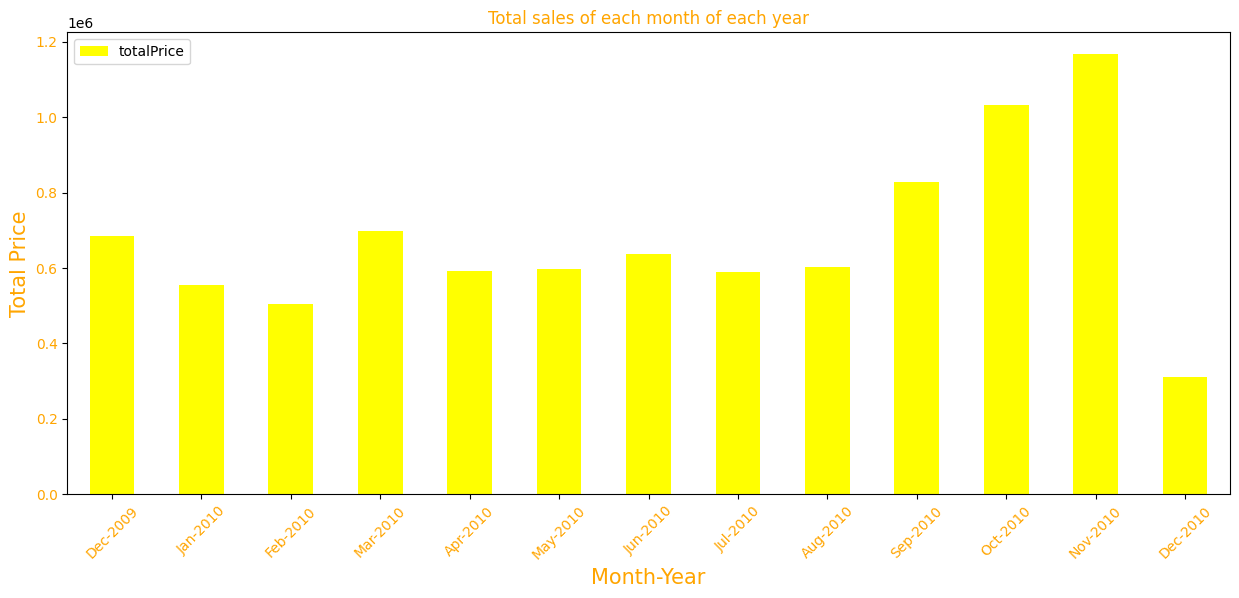

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set_title("Total sales of each month of each year", color="orange")
df["Month-Year"] = df["InvoiceDate"].dt.strftime("%b-%Y")
df["totalPrice"] = df["UnitPrice"] * df["Quantity"]

# Group data by Month-Year and calculate totalPrice for each group
group_by_month_year = df.groupby("Month-Year")["totalPrice"].sum().reset_index()
# Sort by datetime
group_by_month_year["Month-Year"] = pd.to_datetime(group_by_month_year["Month-Year"], format="%b-%Y")
group_by_month_year = group_by_month_year.sort_values(by="Month-Year")
# Change column format back.
group_by_month_year["Month-Year"] = group_by_month_year["Month-Year"].dt.strftime("%b-%Y")

# Create plot
group_by_month_year.plot(kind="bar", x="Month-Year", y="totalPrice", ax=ax, color="yellow")
plt.xlabel("Month-Year", color="orange", size=15)
plt.ylabel("Total Price", color="orange", size=15)
plt.xticks(rotation=45, color="orange")
plt.yticks(color="orange");